# Zuber en Chicago

## Índice <a id='back'></a>
* [Introducción](#intro)
* [Etapa 1. Descripción y preprocesamiento de los datos](#data_review)
    * [1.1. Empresas de taxis](#data_review_taxis)
    * [1.2. Barrios de Chicago](#data_review_neighborhoods)
    * [1.3. Viajes al aeropuerto](#data_review_airport)
    * [1.4. Conclusiones](#data_review_conclusions)
* [Etapa 2. Análisis exploratorio de datos](#data_analysis)
    * [2.1. Las empresas más populares](#data_analysis_companys)
    * [2.2. Los barrios más populares](#data_analysis_neighborhoods)
    * [2.3. Conclusiones](#data_analysis_conclusions)
* [Etapa 4. Comprobación de hipótesis](#data_hypothesis)
* [Etapa 5. Conclusión general](#data_conclusion)

## Introducción <a id='intro'></a>

Este proyecto es realizado para la empresa Zuber de viajes compartidos que se está lanzando en Chicago. Se desea encontrar patrones en la información disponible. Se cuenta con datos sobre compañías de taxis, los viajes realizados en noviembre de 2017, así como las condiciones climáticas de las mismas fechas.

**Objetivo e Hipótesis**

El objetivo es comprender las preferencias de los pasajeros y el impacto de los factores externos sobre los viajes. Se establece la siguiente hipótesis:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

**Etapas**
Los datos se almacenan en tres archivos

* `/datasets/project_sql-result_01.csv`.
* `/datasets/project_sql-result_04.csv`.
* `/datasets/project_sql-result_07.csv`.

No hay ninguna información sobre la calidad de los datos así que se examinarán antes de probar la hipótesis.

Primero, se evaluará la calidad de los datos y si los problemas son significativos, entonces, durante el preprocesamiento de datos, se tomará en cuenta los problemas más críticos. Finalmente se comprobará la hipótesis para presentar las conclusiones.
 
El proyecto consistirá en cuatro etapas:
 1. Descripción y preprocesamiento de los datos.
 2. Análisis exploratorio de los datos.
 3. Comprobación de hipótesis.
 4. Conclusión general.

[Volver a Contenidos](#back)

## Etapa 1. Descripción y preprocesamiento de los datos <a id='data_review'></a>

Se importan las librerías necesarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats as st
from math import ceil, factorial
from scipy.stats import levene

Se leen los archivos y se guardarán en un diccionario.

In [2]:
name_file = ['project_sql_result_01.csv', 'project_sql_result_04.csv', 'project_sql_result_07.csv']
files = ['/datasets/project_sql_result_01.csv', '/datasets/project_sql_result_04.csv', '/datasets/project_sql_result_07.csv']
sql = {}
for i in [0, 1, 2]:
    try:
        sql[i] = pd.read_csv(name_file[i])
    except:
        sql[i] = pd.read_csv(files[i])

### 1. 1. Empresas de taxis <a id='data_review_taxis'></a>

Se imprimirá la información general del primer archivo y las primeras 10 filas. Este archivo contiene los nombres de las empresas de taxis y la cantidad de viajes realizados el 15 y 16 de noviembre de 2017.

In [3]:
sql[0].info()
print(sql[0].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


La tabla contiene 64 filas y 2 columnas, las cuales son:

1. `'company_name'` - nombre de la empresa de taxis.
2. `'trips_amount'` - cantidad de viajes realizados el 15 y 16 de noviembre de 2017.

No existen valores ausentes y los tipos de datos son correctos. Se imprimirán los valores únicos de la columna `'company_name'` para determinar si existen duplicados implícitos.

In [4]:
print(sql[0]['company_name'].sort_values().unique())

['0118 - 42111 Godfrey S.Awir' '1085 - 72312 N and W Cab Co'
 '1469 - 64126 Omar Jada' '2092 - 61288 Sbeih company'
 '2192 - 73487 Zeymane Corp' '2241 - 44667 - Felman Corp, Manuel Alonso'
 '24 Seven Taxi' '2733 - 74600 Benny Jona'
 '2809 - 95474 C & D Cab Co Inc.' '2823 - 73307 Lee Express Inc'
 '3011 - 66308 JBL Cab Inc.' '303 Taxi' '3556 - 36214 RC Andrews Cab'
 '3591 - 63480 Chuks Cab' '3620 - 52292 David K. Cab Corp.'
 '3623 - 72222 Arrington Enterprises'
 '3721 - Santamaria Express, Alvaro Santamaria'
 '4053 - 40193 Adwar H. Nikola' '4615 - 83503 Tyrone Henderson'
 '4623 - 27290 Jay Kim' '5 Star Taxi' '5006 - 39261 Salifu Bawa'
 '5062 - 34841 Sam Mestas' '5074 - 54002 Ahzmi Inc'
 '5874 - 73628 Sergey Cab Corp.' '5997 - 65283 AW Services Inc.'
 '6057 - 24657 Richard Addo' '6574 - Babylon Express Inc.'
 '6742 - 83735 Tasha ride inc' '6743 - 78771 Luhak Corp' 'American United'
 'American United Taxi Affiliation' 'Blue Diamond'
 'Blue Ribbon Taxi Association Inc.' 'Checker Taxi'
 'Ch

No existen duplicados implícitos.

[Volver a Contenidos](#back)

### 1. 2. Barrios de Chicago <a id='data_review_neighborhoods'></a>

Se imprimirá la información general del segundo archivo y las primeras diez filas. Este archivo contiene los nombres de los barrios de Chicago donde terminaron los viajes (en noviembre de 2017), así como el promedio de éstos.

In [5]:
sql[1].info()
print(sql[1].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


La tabla contiene 94 filas y 2 columnas, las cuales son:

1. `'dropoff_location_name'` - barrios de Chicago donde finalizaron los viajes.
2. `'average_trips'` - el promedio de viajes (noviembre de 2017) que terminaron en cada barrio.

No existen valores ausentes y el tipo de datos es correcto. Se imprimirán los valores únicos de la columna `'dropoff_location_name'` para verificar que no existan duplicados implícitos.

In [6]:
print(sql[1]['dropoff_location_name'].sort_values().unique())

['Albany Park' 'Andersonville' 'Archer Heights' 'Armour Square' 'Ashburn'
 'Auburn Gresham' 'Austin' 'Avalon Park' 'Avondale' 'Belmont Cragin'
 'Beverly' 'Boystown' 'Bridgeport' 'Brighton Park' 'Bucktown' 'Burnside'
 'Calumet Heights' 'Chatham' 'Chicago Lawn' 'Chinatown' 'Clearing'
 'Douglas' 'Dunning' 'East Side' 'East Village' 'Edgewater' 'Edison Park'
 'Englewood' 'Fuller Park' 'Gage Park' 'Garfield Park' 'Garfield Ridge'
 'Gold Coast' 'Grand Boulevard' 'Grand Crossing' 'Grant Park' 'Hegewisch'
 'Hermosa' 'Humboldt Park' 'Hyde Park' 'Irving Park' 'Jackson Park'
 'Jefferson Park' 'Kenwood' 'Lake View' 'Lincoln Park' 'Lincoln Square'
 'Little Italy, UIC' 'Little Village' 'Logan Square' 'Loop'
 'Lower West Side' 'Mckinley Park' 'Montclare' 'Morgan Park'
 'Mount Greenwood' 'Museum Campus' 'Near South Side' 'New City'
 'North Center' 'North Lawndale' 'North Park' 'Norwood Park' "O'Hare"
 'Oakland' 'Old Town' 'Portage Park' 'Pullman' 'River North' 'Riverdale'
 'Rogers Park' 'Roseland' 'Ru

No existen duplicados implícitos.

[Volver a Contenidos](#back)

### 1. 3. Viajes al aeropuerto <a id='data_review_airport'></a>

Se imprimirá la información general del tercer archivo y las primeras 10 filas. Este archivo contiene información sobre viajes desde el barrio Loop al Aeropuerto Internacional O'Hare.

In [7]:
sql[2].info()
print(sql[2].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            246

La tabla contiene 1068 filas y 3 columnas, las cuales son:

1. `'start_ts'` - fecha y hora de inicio del viaje.
2. `'weather_conditions'` - condiciones climáticas al inicio del viaje (`'Bad'` para lluvia o tormenta y `'Good'` en cualquier otro caso).
3. `'duration_seconds'` - duración del viaje en segundos.

No contiene valores ausentes. Se cambiará el tipo de datos de la columna `'start_ts'` a formato fecha.

In [8]:
sql[2]['start_ts'] = pd.to_datetime(sql[2]['start_ts'], format='%Y-%m-%d %H:%M:%S')
sql[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Se cambiará el tipo de datos en la columna `'duration_seconds'` por int64.

In [9]:
sql[2]['duration_seconds'] = sql[2]['duration_seconds'].astype('int64')
sql[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


Los tipos de datos son correctos para cada columna.

[Volver a Contenidos](#back)

### 1. 4. Conclusiones <a id='data_review_conclusions'></a>

Se importaron las librerías necesarias y se guardaron los tres archivos en un diccionario. Al imprimir la información de cada uno se observó que ninguna de las tablas contenía valores ausentes ni duplicados implícitos.

En el tercer archivo se cambiaron los tipos de datos de las columnas `'start_ts'` y `'duration_seconds'` a formato fecha y a enteros respectivamente.

Los datos son suficientes para comprobar hipótesis.

[Volver a Contenidos](#back)

## Etapa 2. Análisis exploratorio de datos <a id='data_analysis'></a>

En esta etapa se analizarán los datos. Primero se analizarán cuáles fueron las compañías con más viajes los días 15 y 16 de noviembre de 2017. También se identificarán los 10 barrios de Chicago donde finalizaron más viajes.

### 2. 1. Las empresas más populares <a id='data_analysis_companys'></a>

Se analizarán los datos del primer DataFrame `sql[0]` el cual contiene la cantidad de viajes realizados el 15 y 16 de noviembre de 2017 por compañía de taxis.

In [10]:
print(sql[0].describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


Se observa que el 75% de las empresas registraron menos de 2106 viajes en esos dos días, esta cantidad no difiere mucho de la media. Sin embargo, existen empresas que registraron hasta 19,558 viajes, lo que indica una gran dispersión en los datos. Se agruparán las compañías que hayan registrado menos de 3,000 bajo la etiqueta `'other'` para determinar las compañías más populares.

In [11]:
def company_group(row): #función para agrupar en other la compañias menos populares
    company = row['company_name']
    trips = row['trips_amount']
    if trips < 3000:
        company = 'other'
    else:
        company
    return company

In [12]:
df_test = pd.DataFrame() #DataFrane de prueba
df_test['company_name'] = ['taxi 1', 'taxi 2']
df_test['trips_amount'] = [23, 3001]
print(df_test)
print()
df_test['company_name'] = df_test.apply(company_group, axis=1)
print(df_test)

  company_name  trips_amount
0       taxi 1            23
1       taxi 2          3001

  company_name  trips_amount
0        other            23
1       taxi 2          3001


In [13]:
sql[0]['company_name'] = sql[0].apply(company_group, axis=1) #aplicamos la función al DataFrame
print(len(sql[0].query('company_name == "other"'))) #cantidad de compañias en 'other'

50


De las 64 compañías, 50 de ellas no superan los 3,000 viajes en dos días. Se agrupará la tabla por compañía y se mostrará un gráfico de barras.

In [14]:
company_trips = sql[0].groupby('company_name')['trips_amount'].sum().sort_values(ascending=False)
print(company_trips)

company_name
other                                22111
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasin                     10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Choice Taxi Association               5015
Globe Taxi                            4383
Dispatch Taxi Affiliation             3355
Nova Taxi Affiliation Llc             3175
Name: trips_amount, dtype: int64


Text(0, 0.5, 'Trips amount')

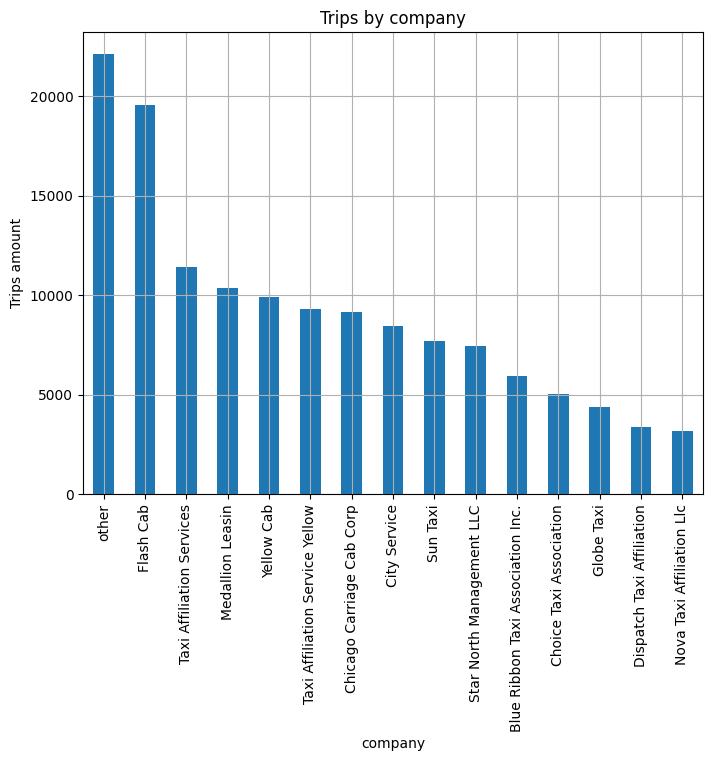

In [15]:
company_trips.plot(kind='bar', grid=True, figsize=(8, 6), title='Trips by company')
plt.xlabel('company')
plt.ylabel('Trips amount')

La empresa Flash Cab es la más popular con 19,558 viajes en dos días, casi la misma cantidad de las 50 empresas que conforman el grupo `'other'` con 22,111. El tercer puesto lo ocupa la empresa Taxi Affiliation Services 11,422 viajes lo que es una diferencia considerable con Flash Cab. Para los siguientes puestos, la cantidad de viajes va disminuyendo no tan abruptamente.

[Volver a Contenidos](#back)

### 2. 2. Las barrios más populares <a id='data_analysis_neighborhoods'></a>

Se analizarán los datos del segundo DataFrame `sql[1]` el cual contiene el promedio de viajes terminados en noviembre de 2017 para cada barrio de Chicago. Este DataFrame contiene 94 filas, se imprimirá la cantidad de valores únicos en la columna `'dropoff_location_name'` para identificar cuantos barrios se tienen.

In [16]:
print(len(sql[1]['dropoff_location_name'].unique()))

94


Esta cantidad coincide con el número de filas, es decir, no se tienen barrios repetidos. Se imprimirán las estadísticas de este DataFrame.

In [17]:
print(sql[1].describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


La media es 599.95 viajes terminados por barrio, sin embargo, existen barrios con 10,727 viajes terminados y otros con sólo 1.8. Se imprimirán únicamente los 10 barrios que cuenten con más viajes terminados y se mostrará un gráfico de barras para mejor visualización.

In [18]:
neighborhoods_top = sql[1].sort_values(by='average_trips', ascending=False)
neighborhoods_top = neighborhoods_top[ : 10]
print(neighborhoods_top)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Text(0, 0.5, 'Average trips')

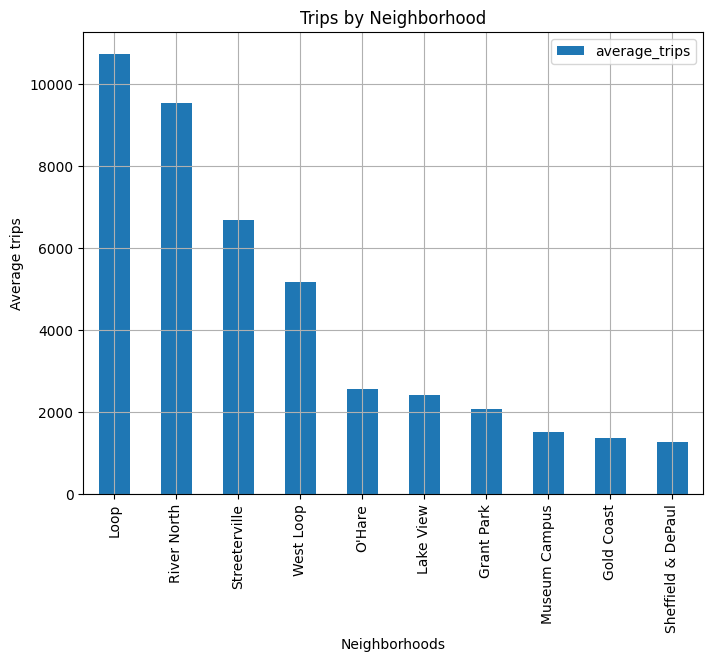

In [19]:
neighborhoods_top.plot(kind='bar', x='dropoff_location_name', title='Trips by Neighborhood', figsize=(8, 6), grid=True)
plt.xlabel('Neighborhoods')
plt.ylabel('Average trips')

El barrio Loop es donde se terminaron más viajes 10,727 seguido por River North (9,523) y Street Ville (6,664). De esta lista de 10 barrios, el que menos viajes tiene es Sheffield & DePaul con 1,259, una diferencia considerable con el más popular.

[Volver a Contenidos](#back)

### 2. 3. Conclusiones <a id='data_analysis_conclusions'></a>

Se determinó que la empresa Flash Cab fue la más popular con casi 19,558 viajes en dos días que es casi la misma cantidad que todos los viajes realizados por 50 empresas en esos mismos dos días. Las otras dos empresas populares son Taxi Affiliation Services y Medallion Leasin con 11,422 y 10,367 viajes respectivamente.

También se identificó que los barrios con la mayor cantidad de viajes finalizados en el mes de noviembre de 2017 fueron Loop (10,727), River North (9,523) y Street Ville (6,664).

[Volver a Contenidos](#back)

## Etapa 3. Comprobación de hipótesis <a id='data_hypothesis'></a>

Se planteó la siguiente hipótesis:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Para comprobar esta hipótesis se utilizarán los datos del tercer DataFrame `sql[2]` el cual contiene datos sobre viajes desde Loop al Aeropuerto Internacional O'Hare (fecha, hora y duración del viaje) así como las condiciones climáticas de cuando comenzó el viaje. En este sentido, se tienen dos condiciones `'Bad'` para condiciones con lluvia o tormenta y `'Good'` para cualquier otro caso. Cabe mencionar que las fechas corresponde únicamente a días sabados de noviembre de 2017.

Se establece como hipótesis nula la siguiente afirmación:

**H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos es la misma que en sábados no lluviosos.**

De esta manera, la hipótesis alternativa coincide con la hipótesis planteada.

Se crearán dos tablas filtradas por condición climática.

In [20]:
weather = {}

for condition in ['Bad', 'Good']:
    weather[condition] = sql[2].query('weather_conditions == @condition')

Antes de realizar un prueba-t se realizará una prueba de Levene para comprobar si las varianzas son iguales o no. El nivel de significancia será del 5%.

In [22]:
alpha = 0.05 #nivel de significancia

results_var = st.levene(weather['Bad']['duration_seconds'], weather['Good']['duration_seconds'])

print('p-value:', results_var.pvalue)

if results_var.pvalue < alpha:
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

p-value: 0.5332038671974493
Las varianzas son iguales


Con este resultado se realizará la prueba-t para varianzas iguales.

In [23]:
results_score = st.ttest_ind(weather['Bad']['duration_seconds'], weather['Good']['duration_seconds'], equal_var=True)

print('p-value:', results_score.pvalue)

if results_score.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


**Conclusiones**

Con el resultado de la prueba-t se rechaza la hipótesis nula, es decir, con un nivel de confianza del 95% se concluye que el promedio de la duración de los viajes en sábados lluviosos es distinta a los sábados no lluviosos.

## Etapa 4. Conclusión general <a id='data_conclusion'></a>

En este estudio se analizaron datos de viajes de Taxi en Chicago durante el mes de noviembre de 2017. El objetivo fue identificar las preferencias de los pasajeros y el impacto de los factores externos sobre los viajes. De este modo, se estudió la cantidad de viajes por compañía de taxis. Se concluyó que la empresa Flash Cab es la más popular.

También se analizó el promedio de viajes finalizados por barrios de Chicago y se concluyó que Loop es el barrio donde se concluyeron más viajes. 

Finalmente se comprobó la hipótesis:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Para veririficar esta hipótesis se hizo una prueba-t con un nivel de significancia del 5%, con lo que se concluyó que puede aceptarse.

[Volver a Contenidos](#back)